<a href="https://colab.research.google.com/github/durgaprasaddp72/crop_yield_analysys_and_prediction/blob/main/crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import all the required frameworks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,plot_tree
from xgboost import XGBRegressor
import pickle



In [ ]:
df=pd.read_csv("yield.csv")

In [ ]:
df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
df.shape

(56717, 12)

Looking at the columns in the csv, we can rename Value to hg/ha_yield to make it easier to recognise that this is our crops yields production value. In addition to removal of unnecessary coloumns like Area Code, Domain, Item Code, etc.

In [ ]:
df=df.rename(index=str,columns={"Value":"hg/hg_yield"})

In [ ]:
df=df.drop(columns=["Year Code","Element Code","Element","Year Code","Area Code","Domain Code","Domain","Unit","Item Code"],axis=1)

In [ ]:
df.head()

,Area,Item,Year,hg/hg_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,56717.0,1989.669570,16.133198,1961.0,1976.0,1991.0,2004.0,2016.0
hg/hg_yield,56717.0,62094.660084,67835.932856,0.0,15680.0,36744.0,86213.0,1000000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/hg_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.2+ MB


The climatic factors include rainfall and temperature.
They are abiotic components, including pesticides and soil, of the environmental factors that influence plant growth and development.

Rainfall has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank.

In [ ]:
df_rain=pd.read_csv("rainfall.csv")
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [ ]:
df_rain=df_rain.rename(index=str,columns={" Area":"Area"})

In [ ]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [ ]:
df_rain['average_rain_fall_mm_per_year']=pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors="coerce")
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


drop the empty rows in rainfall dataframe and merge yield dataframe with rain dataframe by year and area column


In [ ]:
df_rain=df_rain.dropna()

In [ ]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5947 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           5947 non-null   object 
 1   Year                           5947 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 185.8+ KB


In [ ]:
df_rain.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5947.0,2001.365899,9.526335,1985.0,1993.0,2001.0,2010.0,2017.0
average_rain_fall_mm_per_year,5947.0,1124.743232,786.257365,51.0,534.0,1010.0,1651.0,3240.0


In [ ]:
yield_df=pd.merge(df,df_rain,on=["Year","Area"])

In [ ]:
yield_df.shape

(25385, 5)

In [ ]:
yield_df.head()

,Area,Item,Year,hg/hg_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Maize,1986,16875,327.0
2,Afghanistan,Maize,1987,17020,327.0
3,Afghanistan,Maize,1989,16963,327.0
4,Afghanistan,Maize,1990,17582,327.0


We can see that now the years start from the first yield dataframe the starting year was 1961, now it's 1985 because that's when the rainfall data begins.

In [ ]:
yield_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,25385.0,2001.278787,9.143915,1985.0,1994.0,2001.0,2009.0,2016.0
hg/hg_yield,25385.0,68312.278353,75213.292733,50.0,17432.0,38750.0,94286.0,554855.0
average_rain_fall_mm_per_year,25385.0,1254.849754,804.449430,51.0,630.0,1150.0,1761.0,3240.0


In [ ]:
df_pes=pd.read_csv("pesticides.csv")

In [ ]:
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [ ]:
df_pes=df_pes.rename(index=str,columns={"Value":"pesticides_tonnes"})
df_pes=df_pes.drop(columns=["Element","Domain","Unit","Item"],axis=1)

In [ ]:
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [ ]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [ ]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 264.9+ KB


In [ ]:
yield_df=pd.merge(yield_df,df_pes,on=["Year","Area"])
yield_df.shape

(18949, 6)

In [ ]:
yield_df.head()

,Area,Item,Year,hg/hg_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Maize,1991,29068,1485.0,121.0
2,Albania,Maize,1992,24876,1485.0,121.0
3,Albania,Maize,1993,24185,1485.0,121.0
4,Albania,Maize,1994,25848,1485.0,201.0


In [ ]:
df_tem=pd.read_csv("temp.csv")

In [ ]:
df_tem.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
df_tem.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [ ]:
df_tem=df_tem.rename(index=str,columns={"year":"Year","country":"Area"})
df_tem.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
yield_df=pd.merge(yield_df,df_tem,on=["Year","Area"])

In [ ]:
yield_df.head()

,Area,Item,Year,hg/hg_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


In [ ]:
yield_df.shape

(28242, 7)

In [ ]:
yield_df.describe()

,Year,hg/hg_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
yield_df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/hg_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


## data exploration

In [ ]:
yield_df.groupby("Item").count()

,Area,Year,hg/hg_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [ ]:
yield_df["Area"].nunique()

101

In [ ]:
yield_df.groupby(["Area"],sort=True)["hg/hg_yield"].sum().nlargest(10)

,hg/hg_yield
Area,
India,327420324
Brazil,167550306
Mexico,130788528
Japan,124470912
Australia,109111062
Pakistan,73897434
Indonesia,69193506
United Kingdom,55419990
Turkey,52263950


In [ ]:
yield_df.groupby(["Item","Area"],sort=True)["hg/hg_yield"].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/hg_yield, dtype: int64

India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries.

The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries.

Now, exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

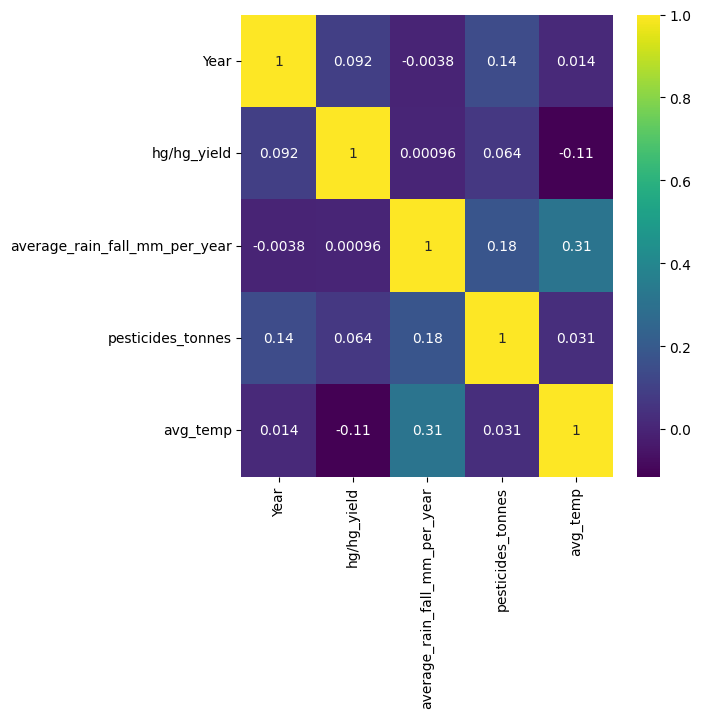

In [ ]:
corr_data=yield_df.corr(numeric_only=True)
plt.figure(figsize=(6,6))
sns.heatmap(corr_data,annot=True,cmap="viridis")
plt.savefig("heatmap.jpg")
plt.show()

it can be seen from the above correlation map that there is no correlation between any of thr columns in the dataframa

## data preprocessing

Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

In [ ]:
yield_df.head()

,Area,Item,Year,hg/hg_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


Encoding Categorical Variables:
There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values. Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert these two columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results.

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
yield_df_one_hot=pd.get_dummies(yield_df,columns=["Area","Item"],prefix=["Country","Item"])
features=yield_df_one_hot.loc[:,yield_df_one_hot.columns!="hg/hg_yield"]
label=yield_df["hg/hg_yield"]
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1991,1485.0,121.0,15.36,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1992,1485.0,121.0,16.06,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1993,1485.0,121.0,16.05,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1994,1485.0,201.0,16.96,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
features=features.drop(["Year"],axis=1)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: bool(111), float64(3)
memory usage: 3.6 MB


In [ ]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,121.0,15.36,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1485.0,121.0,16.06,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1485.0,121.0,16.05,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1485.0,201.0,16.96,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


Scaling Features:
Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [ ]:
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

After dropping year column in addition to scaling all values in features,the resulting array will look something like this

In [ ]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 4.79045997e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.02896082e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 9.08240940e-03, 6.63713799e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 9.17806494e-03, 6.54855196e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

Training Data:
The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are 70/30 or 80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (70% of dataset is training dataset)

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. You can't simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (30% of dataset is testing dataset)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.3,random_state=42)

## model comparision and selection

In [ ]:
from sklearn.metrics import mean_squared_error
model_name=[]
r2score=[]
mse=[]
rmse=[]
def model_eval(name,model,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
 #print(f"the {name} model is training........")
 m=model.fit(x_train,y_train)
 y_pred=m.predict(x_test)
 model_name.append(name)
 r2score.append(r2_score(y_test,y_pred))
 mse.append(mean_squared_error(y_test,y_pred))
 rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))


In [ ]:
models={
    "GradientBoostingRegressor":GradientBoostingRegressor(n_estimators=200,max_depth=3,random_state=0),
    "RandomForestRegressor":RandomForestRegressor(n_estimators=200,max_depth=3,random_state=0),
    "SVR":SVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(random_state=0),
    "XGBRegressor":XGBRegressor(n_estimators=200,max_depth=3,random_state=0)
}

In [ ]:
for name,model in models.items():
  print(f"{name} model is training.......")
  model_eval(name,model)
  print(f"{name} model trained sucsessfully.")


GradientBoostingRegressor model is training.......
GradientBoostingRegressor model trained sucsessfully.
RandomForestRegressor model is training.......
RandomForestRegressor model trained sucsessfully.
SVR model is training.......
SVR model trained sucsessfully.
DecisionTreeRegressor model is training.......
DecisionTreeRegressor model trained sucsessfully.
XGBRegressor model is training.......
XGBRegressor model trained sucsessfully.


In [ ]:
df_score=pd.DataFrame({"model_name":model_name,"r2_score":r2score,"mse":mse,"rmse":rmse}).sort_values(by="r2_score",ascending=False)

In [ ]:
df_score

,model_name,r2_score,mse,rmse
3,DecisionTreeRegressor,0.958267,3.031489e+08,17411.172352
4,XGBRegressor,0.933070,4.861841e+08,22049.581946
0,GradientBoostingRegressor,0.895792,7.569775e+08,27513.224825
1,RandomForestRegressor,0.690766,2.246307e+09,47395.224623
2,SVR,-0.193566,8.670174e+09,93113.768201


The evaluation metric is set based on R^2 (coefficient of determination) regression score function, that will represents the proportion of the variance for items (crops) in the regression model. R^2 score shows how well terms (data points) fit a curve or line.

R^2 is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it's fitted to. If it's a 1, the model 100% predicts the data variance; if it's a 0, the model predicts none of the variance.

From results viewd above, Decision Tree Regressor has the highest R^2 score 0f 96%, GradientBoostingRegressor comes second.

I'll also calculate Adjusted R^2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase. Adjusted R2 will always be less than or equal to R2.

## test the performance on the train set

In [ ]:
model_name=[]
r2score_tra=[]
mse_tra=[]
rmse_tra=[]#performance cheaking on train set
def model_eval_train(name,model,x_train=x_train,x_test=x_train,y_train=y_train,y_test=y_train):
 #print(f"the {name} model is training........")
  m=model.fit(x_train,y_train)
  y_pred=m.predict(x_test)
  model_name.append(name)
  r2score_tra.append(r2_score(y_test,y_pred))
  mse_tra.append(mean_squared_error(y_test,y_pred))
  rmse_tra.append(np.sqrt(mean_squared_error(y_test,y_pred)))


In [ ]:
for name,model in models.items():
  print(f"{name} training.......")
  model_eval_train(name,model)
  print(f"{name} training is completed.")


GradientBoostingRegressor training.......
GradientBoostingRegressor training is completed.
RandomForestRegressor training.......
RandomForestRegressor training is completed.
SVR training.......
SVR training is completed.
DecisionTreeRegressor training.......
DecisionTreeRegressor training is completed.
XGBRegressor training.......
XGBRegressor training is completed.


In [ ]:
df_score_train=pd.DataFrame({"model_name":model_name,"r2_score":r2score_tra,
                       "mse":mse_tra,"rmse":rmse_tra}).sort_values(by="r2_score",
                                                           ascending=False)

In [ ]:
df_score_train

,model_name,r2_score,mse,rmse
3,DecisionTreeRegressor,0.999697,2.178778e+06,1476.068459
4,XGBRegressor,0.938204,4.447688e+08,21089.542432
0,GradientBoostingRegressor,0.897745,7.359616e+08,27128.611376
1,RandomForestRegressor,0.684018,2.274225e+09,47688.838865
2,SVR,-0.198456,8.625671e+09,92874.493066


In [ ]:
df_score

,model_name,r2_score,mse,rmse
3,DecisionTreeRegressor,0.958267,3.031489e+08,17411.172352
4,XGBRegressor,0.933070,4.861841e+08,22049.581946
0,GradientBoostingRegressor,0.895792,7.569775e+08,27513.224825
1,RandomForestRegressor,0.690766,2.246307e+09,47395.224623
2,SVR,-0.193566,8.670174e+09,93113.768201


feature importance of the DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(f"score is:{r2_score(y_test,y_pred)}")

score is:0.958267474406943


In [ ]:
yield_df_one_hot.columns[2:]

Index(['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp',
       'Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Argentina', 'Country_Armenia', 'Country_Australia',
       'Country_Austria',
       ...
       'Item_Cassava', 'Item_Maize', 'Item_Plantains and others',
       'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans',
       'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams'],
      dtype='object', length=114)

In [ ]:
df_feature_imp=pd.DataFrame({
                            "column_name":yield_df_one_hot.columns[2:],
                            "feature_importance":dt.feature_importances_}).sort_values(by="feature_importance",ascending=False)

In [ ]:
df_feature_imp

,column_name,feature_importance
107,Item_Potatoes,3.744480e-01
104,Item_Cassava,9.874623e-02
1,pesticides_tonnes,8.918740e-02
111,Item_Sweet potatoes,8.683173e-02
45,Country_India,5.680449e-02
...,...,...
58,Country_Lithuania,2.037531e-07
55,Country_Lebanon,1.762000e-07
66,Country_Montenegro,1.262526e-07
54,Country_Latvia,6.548004e-08


feature importance of the DecisionTreeRegressor


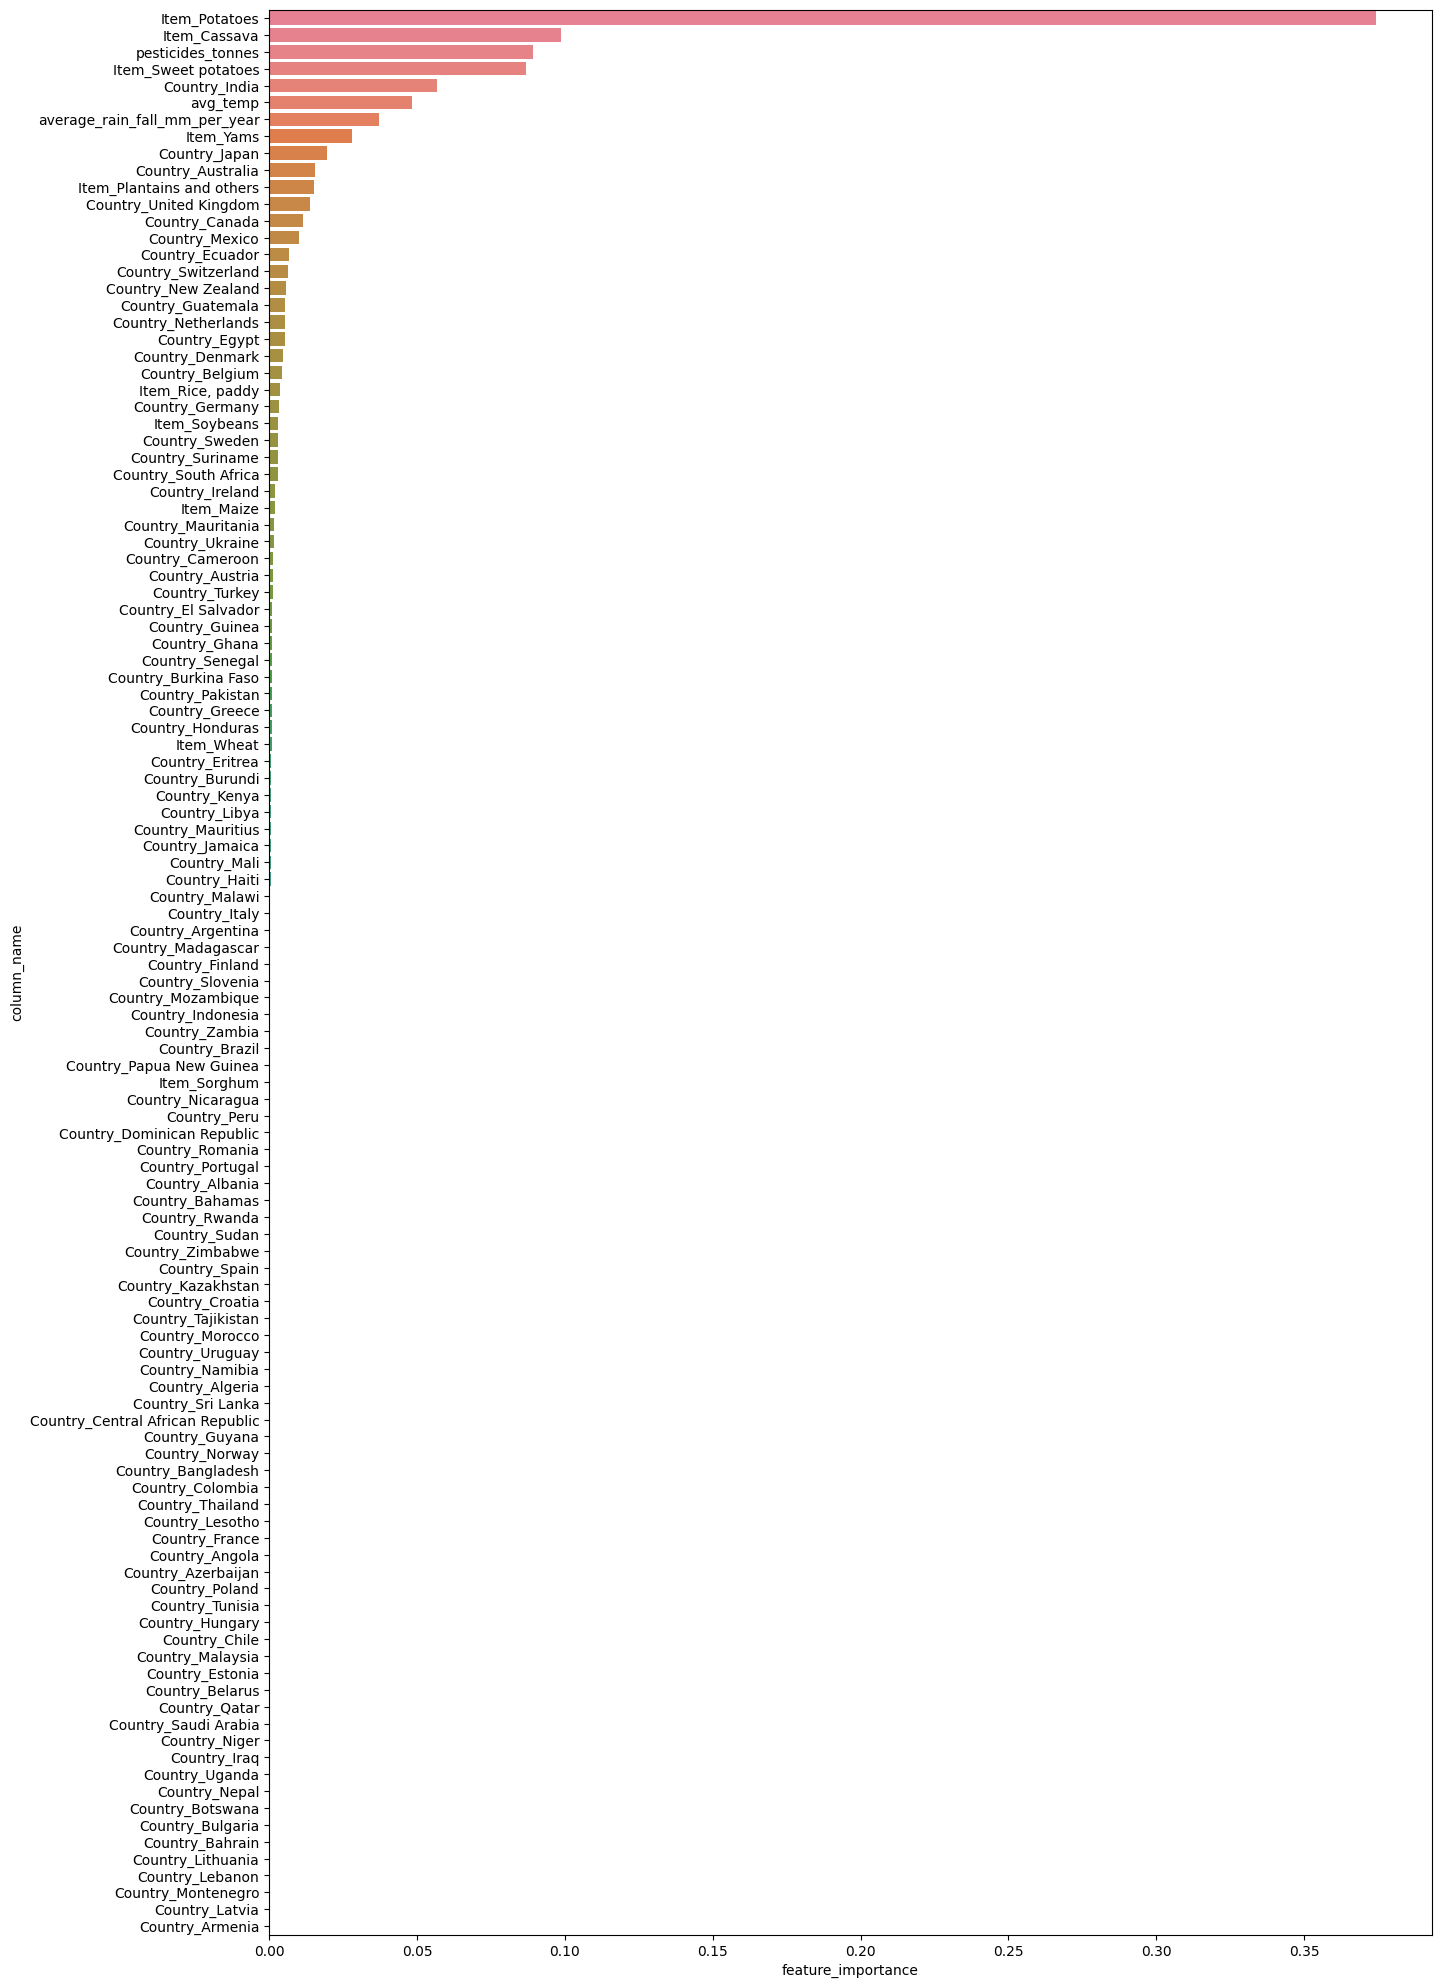

In [ ]:
plt.figure(figsize=(15,25))
print("feature importance of the DecisionTreeRegressor")
sns.barplot(x=df_feature_imp["feature_importance"],y=df_feature_imp["column_name"],hue=df_feature_imp["column_name"],units=True)
plt.show()

In [ ]:
top_df_feature_imp=df_feature_imp.nlargest(7,"feature_importance")
top_df_feature_imp=top_df_feature_imp.sort_values(by="feature_importance",ascending=False)
top_df_feature_imp

,column_name,feature_importance
107,Item_Potatoes,0.374448
104,Item_Cassava,0.098746
1,pesticides_tonnes,0.089187
111,Item_Sweet potatoes,0.086832
45,Country_India,0.056804
2,avg_temp,0.048151
0,average_rain_fall_mm_per_year,0.037096


 top 7 feature importance of the DecisionTreeRegressor


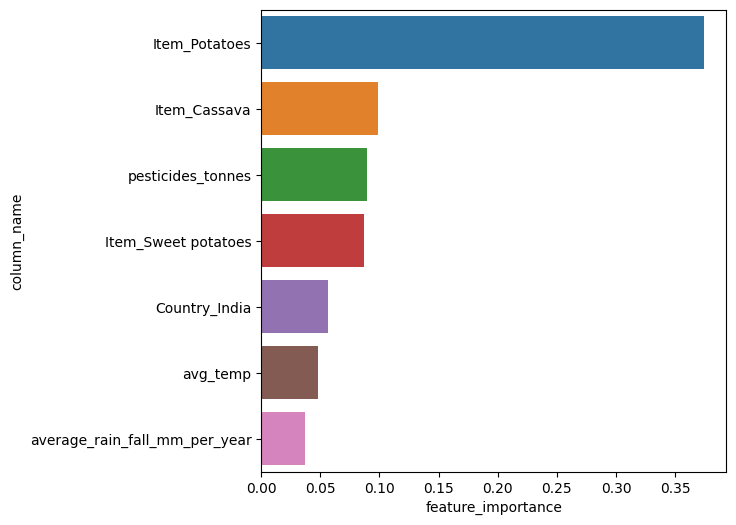

In [ ]:

plt.figure(figsize=(6,6))
print(" top 7 feature importance of the DecisionTreeRegressor")
sns.barplot(x=top_df_feature_imp["feature_importance"],y=top_df_feature_imp["column_name"],hue=top_df_feature_imp["column_name"],units=True)
plt.show()

The crop being potatoes has the highest importance in the decision making for the model, where it's the highest crops in the dataset. Cassava too, then as expected we see the effect of pesticides, where its the third most important feature, and then if the crop is sweet potatoes, we see some of the highest crops in features importance in dataset.

If the crop is grown in India, makes sense since Indis has the largest crops sum in the dataset. Then comes rainfall and temprature. Thr first assumption about these features were correct, where they all significanally impact the expected crops yield in the model.

In [ ]:
yield_df.head(5)

,Area,Item,Year,hg/hg_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


/tmp/ipython-input-332714773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Item",y="hg/hg_yield",palette="vlag",data=yield_df,ax=ax);


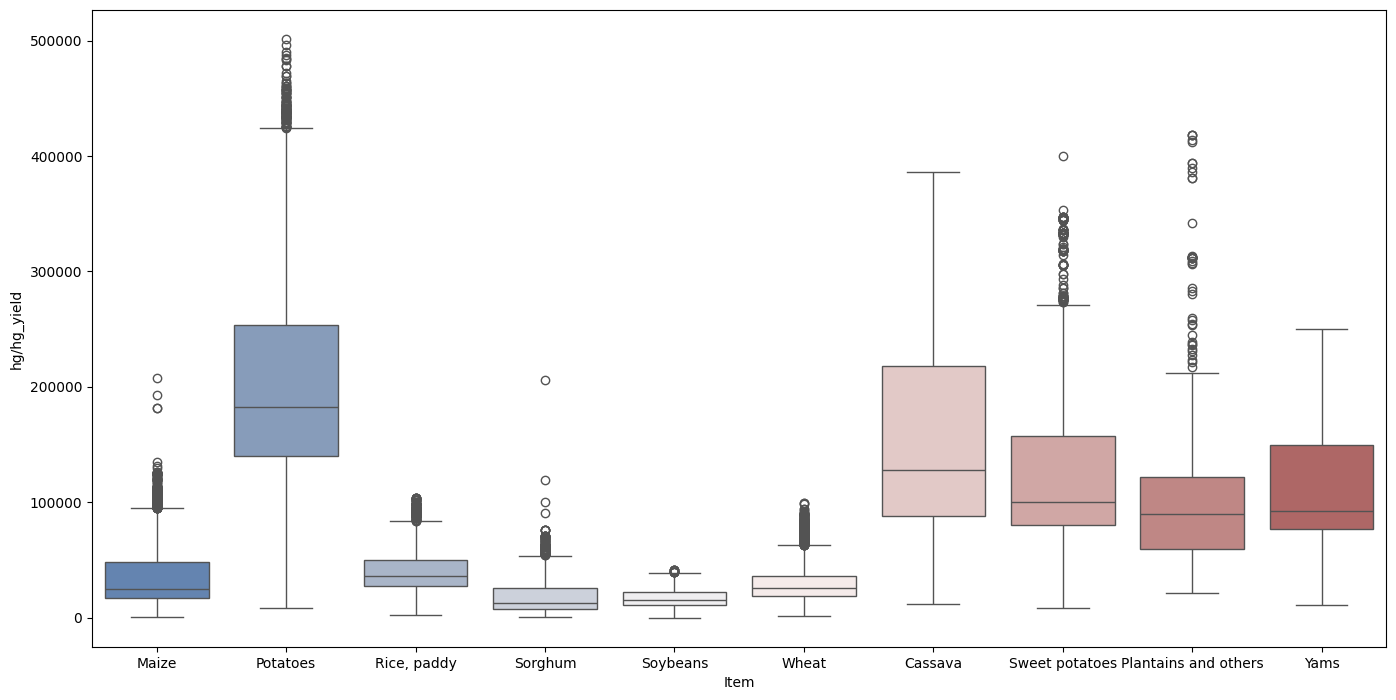

In [ ]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/hg_yield",palette="vlag",data=yield_df,ax=ax);
plt.show()

## feature importance of the xgb regressor

In [ ]:
xgb=XGBRegressor(n_estimators=200,max_depth=3, random_state=0)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(f"score is:{r2_score(y_test,y_pred)}")

score is:0.9330702424049377


In [ ]:
df_feature_imp=pd.DataFrame({
                            "column_name":yield_df_one_hot.columns[2:],
                            "feature_importance":xgb.feature_importances_}).sort_values(by="feature_importance",ascending=False)

feature importance of the XGBRegressor


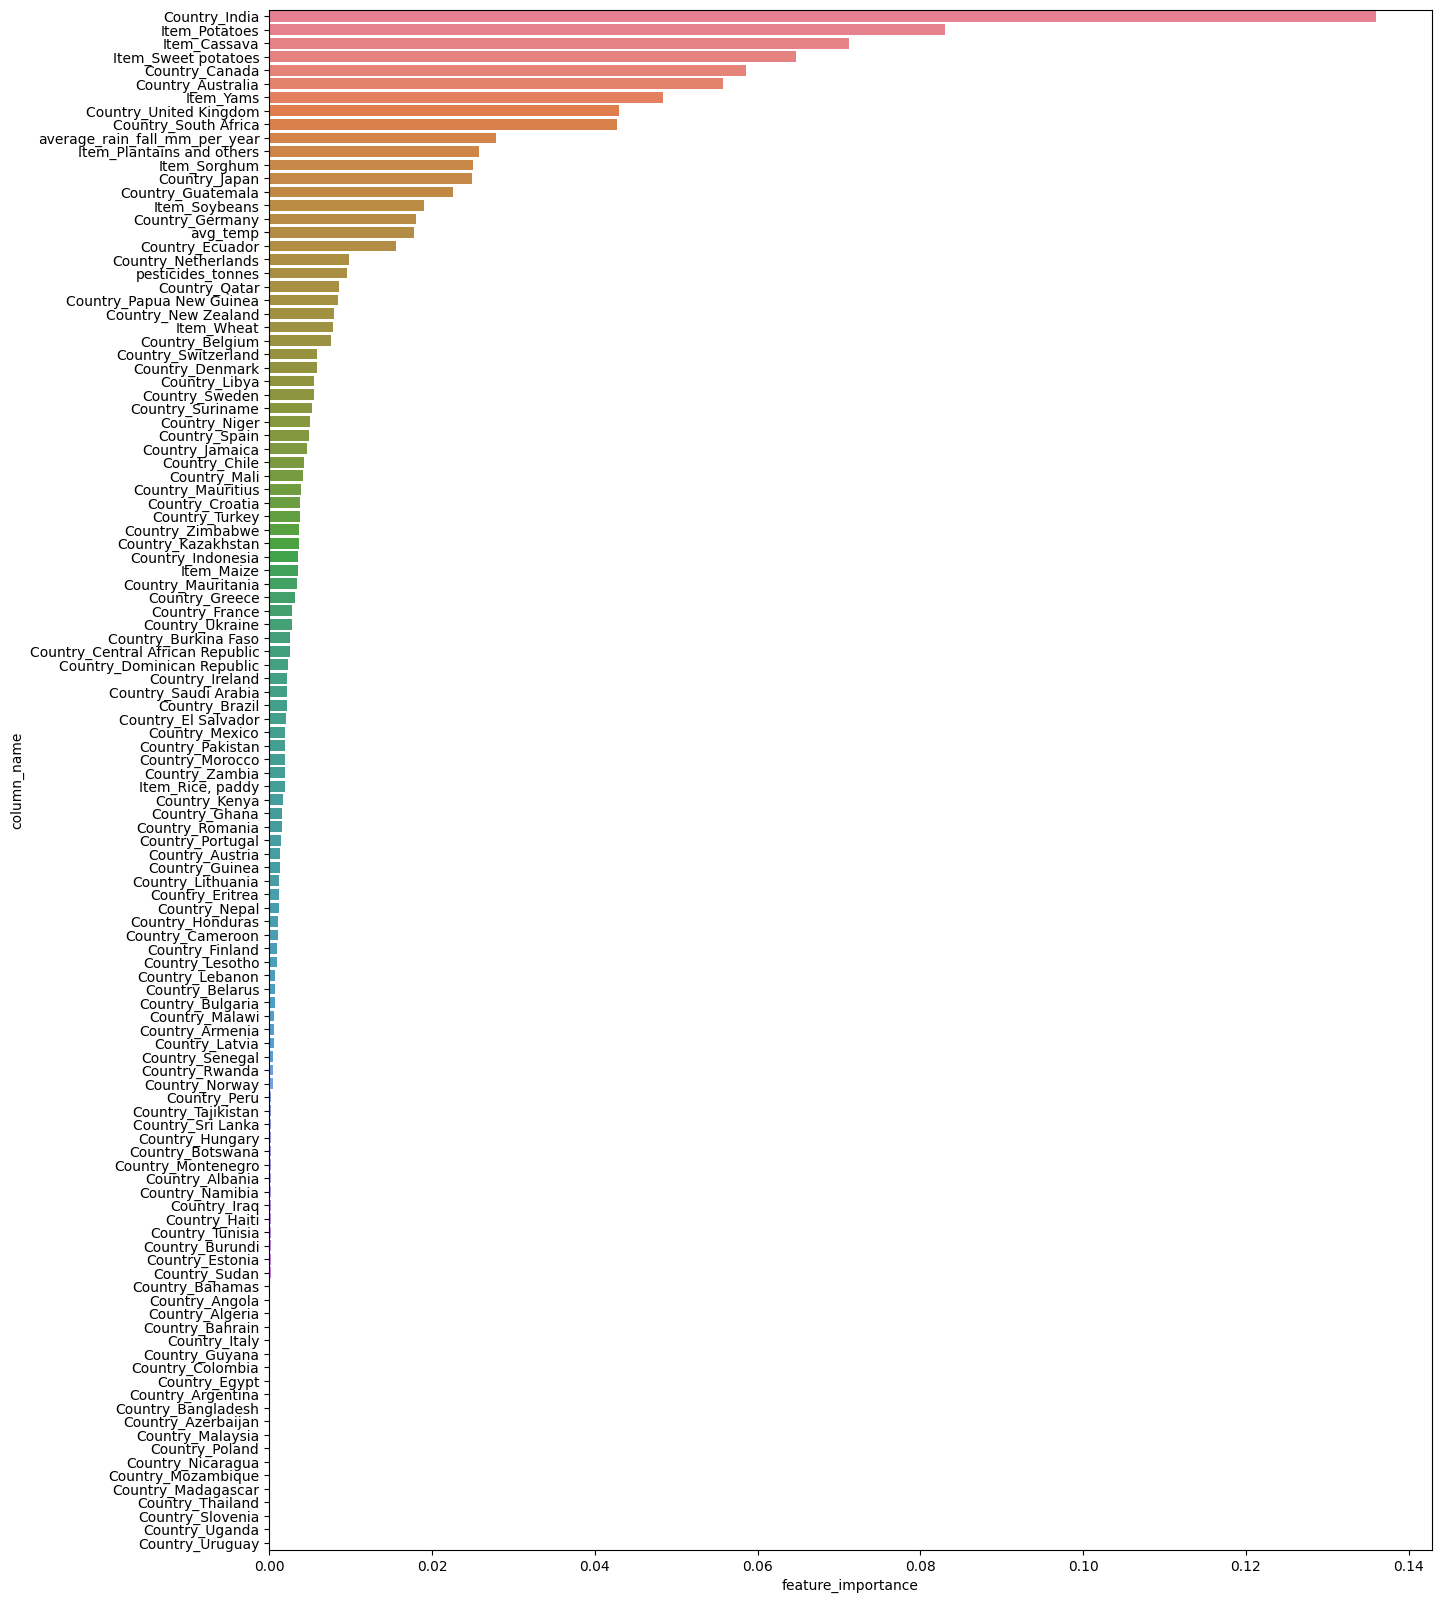

In [ ]:
plt.figure(figsize=(15,20))
print("feature importance of the XGBRegressor")
sns.barplot(x=df_feature_imp["feature_importance"],y=df_feature_imp["column_name"],hue=df_feature_imp["column_name"],units=True)
plt.show()

getting top 10 important features of XGBRegressor model

In [ ]:
top=df_feature_imp.nlargest(10,"feature_importance")

top 10 important features of the xgbregressor model


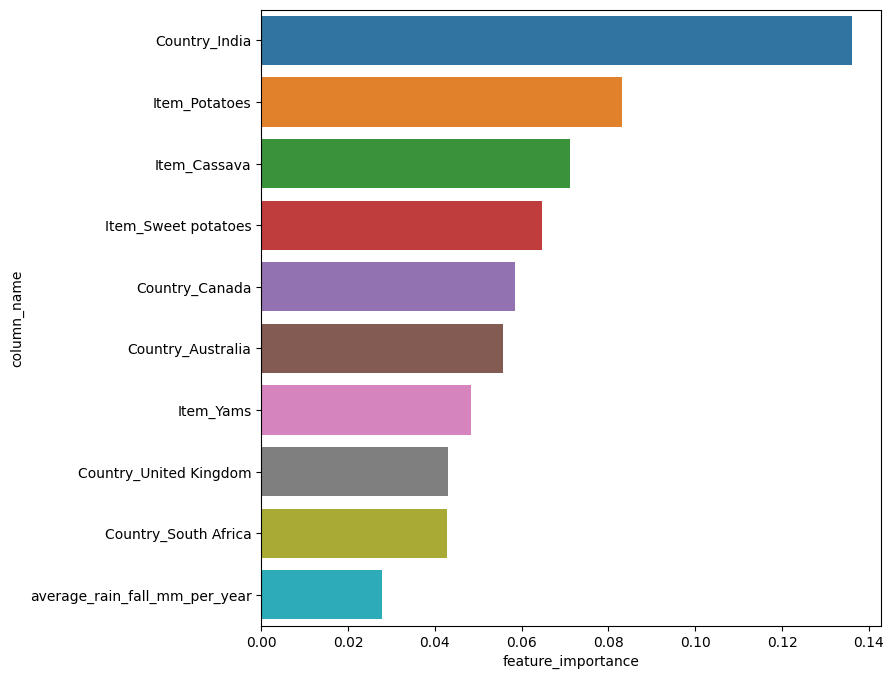

In [ ]:
print(f"top 10 important features of the xgbregressor model")
plt.figure(figsize=(8,8))
sns.barplot(x=top['feature_importance'],y=top['column_name'],hue=top["column_name"])
plt.show()

## model saving

In [ ]:
import pickle
print(f"{dt} is saving....")
pickle.dump(dt,open("DecisionTreeregressor.pkl","wb"))
print(f"{dt} is saved sucsessfully.")

DecisionTreeRegressor(random_state=0) is saving....
DecisionTreeRegressor(random_state=0) is saved sucsessfully.


In [ ]:
print(f"{xgb} is saving....")
pickle.dump(xgb,open("XGBRegressor.pkl","wb"))
print(f"{xgb} is saved sucsessfully.")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...) is saving....
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval

## checking

In [ ]:
dtt=pickle.load(open("DecisionTreeregressor.pkl",'rb'))

In [ ]:
dtt

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred=dtt.predict(x_test)
print(f"score is:{r2_score(y_test,y_pred)}")

score is:0.958267474406943


In [ ]:
xgbr=pickle.load(open("XGBRegressor.pkl",'rb'))
xgbr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=xgbr.predict(x_test)
print(f"score is:{r2_score(y_test,y_pred)}")

score is:0.9330702424049377


here we are save the trained model uding pickle when we load back to use them no need to train again.

## conclusion

here both xgb and decisiontree models perform good for our data .
but the decisiontree model seems to  belittle  overfitted.